In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-data-with-colors/fruit_data_with_colors.txt


# <center>A simple classification task</center>
---

## Import required modules and load the data

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection

In [3]:
# import data
fruits = pd.read_table("/kaggle/input/fruit-data-with-colors/fruit_data_with_colors.txt")

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits.groupby("fruit_name").max()

,fruit_label,fruit_subtype,mass,width,height,color_score
fruit_name,,,,,,
apple,1,granny_smith,192,8.4,7.9,0.93
lemon,4,unknown,216,7.3,10.5,0.74
mandarin,2,mandarin,86,6.2,4.7,0.81
orange,3,turkey_navel,362,9.6,9.4,0.82


* apple ---> 1
* mandarin ---> 2
* orange ---> 3
* lemon ---> 4

In [6]:
fruits.shape

(59, 7)

## Create train test split

In [7]:
X = fruits[["mass","width","height","color_score"]]
y = fruits["fruit_label"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((47, 4), (12, 4), (47,), (12,))

## Create pairplot
**to understand the relationships of the features along with each other**

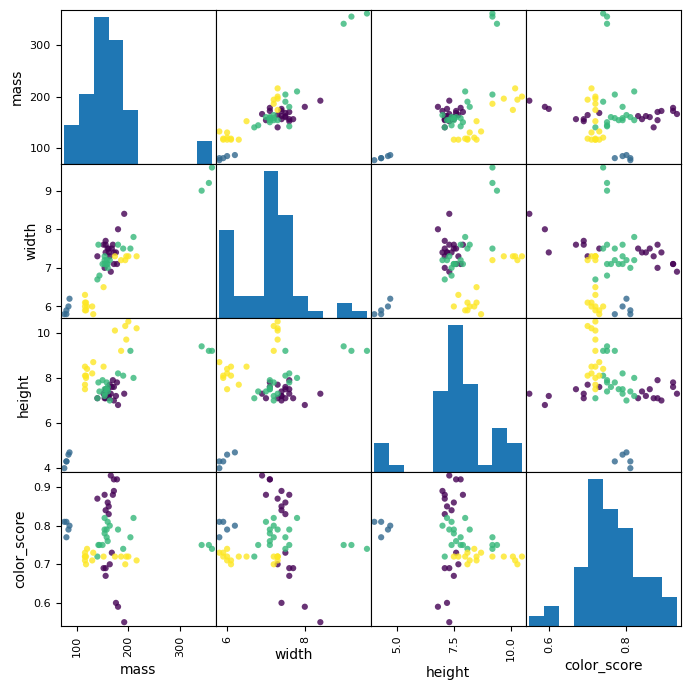

In [8]:
%matplotlib inline
scatter = pd.plotting.scatter_matrix(X,c = y,figsize=(8,8), s = 20, marker="o", alpha = 0.8)

## Create a 3D plot

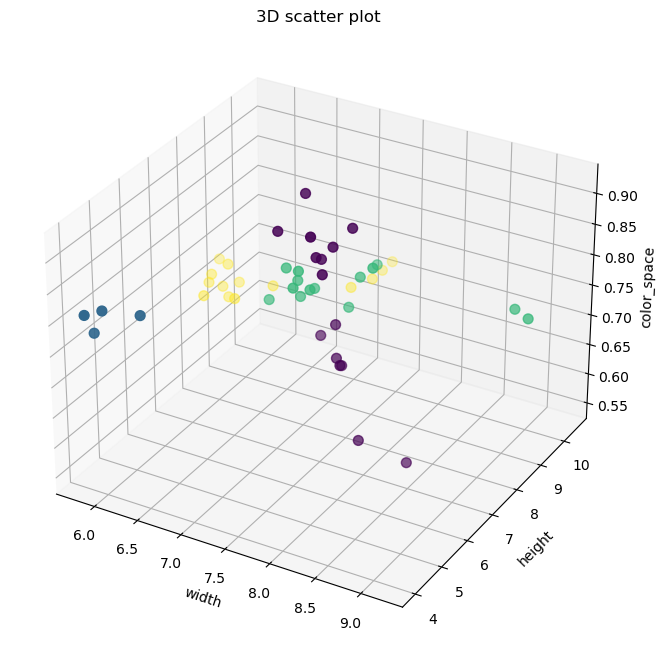

In [9]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111,projection="3d")
ax.scatter(X_train["width"], X_train["height"],X_train["color_score"], c=y_train, marker="o", s = 50)
ax.set_title("3D scatter plot")
ax.set_xlabel("width")
ax.set_ylabel("height")
ax.set_zlabel("color_space")
plt.show()